### Dataset: Campaña de marketing de un banco

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
sns.set()

#### Abro el Dataset que guarde en la PRA1

In [2]:
%store -r dataset_bank

In [3]:
dataset = dataset_bank.copy()

In [4]:
dataset['y'] = dataset['y'].apply(lambda x: 0 if x == 'no' else 1)

In [5]:
dataset.head()

,default,balance,housing,loan,duration,previous,y,job_admin.,job_blue-collar,job_entrepreneur,...,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,contact_cellular,contact_telephone,contact_unknown
0,0,2143.0,1,0,261,0.0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,1
1,0,29.0,1,0,151,0.0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1
2,0,2.0,1,1,76,0.0,0,0,0,1,...,0,1,0,0,1,0,0,0,0,1
3,0,1506.0,1,0,92,0.0,0,0,1,0,...,0,1,0,0,0,0,1,0,0,1
4,0,1.0,0,0,198,0.0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,1


In [6]:
#Separo los datos en X, los atributos con los que entrenaran los modelos, e y, la variable target 

X = dataset_bank.drop(['y'], axis = 1)
y = dataset_bank['y'].apply(lambda x: 0 if x == 'no' else 1)

print(X.shape, y.shape)

(45211, 28) (45211,)


In [7]:
columns_X = X.columns
columns_X

Index(['default', 'balance', 'housing', 'loan', 'duration', 'previous',
       'job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'education_primary', 'education_secondary', 'education_tertiary',
       'education_unknown', 'contact_cellular', 'contact_telephone',
       'contact_unknown'],
      dtype='object')

In [8]:
#Escalo los datos para que todos los atributos esten en la misma escala

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [9]:
print(X.shape,y.shape)

(45211, 28) (45211,)


#### 1. 2. Aplico distintos modelos no supervisado variando la métrica que utilizan para medir la distancia entre los puntos, sobre el juego de datos.

Como primer modelo voy a aplicar K Means, este modelo separa los datos que recibe en una cantidad determinada de grupos de igual varianza, minimizando un criterio llamado 'Inertia' o 'Suma de cuadrados dentro del cluster'. Es decir que la métrica que usa este modelo como función de distancia es el cuadrado de la diferencia, seleccionando a qué cluster pertenece cada punto a partir de la minima distancia de ese punto a uno de los centros de los cluster.

In [10]:
from sklearn.cluster import KMeans

In [11]:
data = dataset_bank.drop(['y'], axis = 1)

In [12]:
data.columns

Index(['default', 'balance', 'housing', 'loan', 'duration', 'previous',
       'job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'education_primary', 'education_secondary', 'education_tertiary',
       'education_unknown', 'contact_cellular', 'contact_telephone',
       'contact_unknown'],
      dtype='object')

Como inicialmente no conozco el número óptimo de clústers, pruebo con varios valores.
Para la selección del número de clústers lo haré primero en base a la inspección de la gráfica que se obtiene al iterar con el mismo  conjunto de datos para distintos valores del número de clústers, obteniendo en cada  iteración la suma de las distancias al cuadrado de todas las muestras a su centroide de cluster mas cercano, este valor lo obtengo con el método inertia_ del modelo Kmeans. 
Finalmente, seleccionaré el valor de clusters que se encuentra en el "codo" de la curva. 

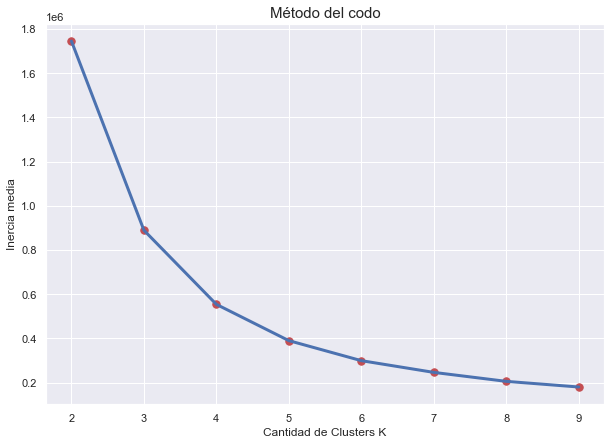

In [13]:
lista_distancias_medias = []
# Entreno un modelo para cada numero de cluster que quiero probar
K = np.arange(2,10)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(dataset)
    #Inertia me da la suma de las distancias para todas las instancias del dataset
    distancia_total = km.inertia_
    # Calculo la distancia media y la agrego a la lista
    distancia_media = distancia_total/len(dataset)
    lista_distancias_medias.append(distancia_media)

#Grafico 
plt.figure(figsize = (10,7))
plt.plot(K,lista_distancias_medias, lw=3)
plt.scatter(K, lista_distancias_medias,s=55,c='r')
plt.xlabel('Cantidad de Clusters K')
plt.ylabel('Inercia media')
plt.title('Método del codo', fontsize = 15)
plt.show()

Vemos que el 'codo', donde se encuentra el valor ideal del numero de clusters para este conjunto de datos, está entre 3 y 4. 

#### Pruebo con n_clusters = 4

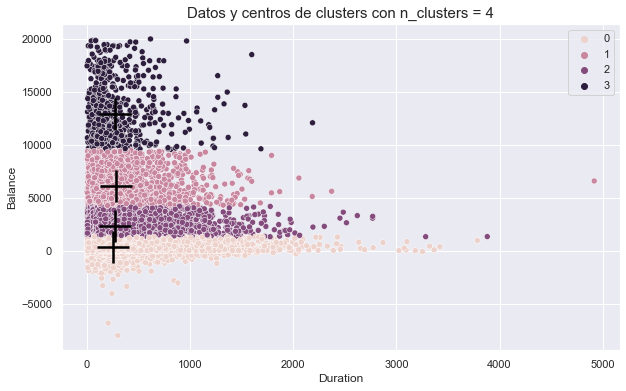

In [14]:
kmeans = KMeans(n_clusters=4)
kmeans = kmeans.fit(dataset)

# Obtengo la posición de los centros y las etiquetas
etiquetas_ = kmeans.labels_
centros_ = kmeans.cluster_centers_

# Grafico con dos variables: En este caso elijo ver las variables balance y duration que son las que tienen 
# informacion que puede servirme para entender la distribucion de los grupos 
plt.figure(figsize = (10,6))
sns.scatterplot(x = dataset.iloc[:,4],y = dataset.iloc[:,1], hue = etiquetas_)
sns.scatterplot(x = centros_[:, 4],y = centros_[:, 1],color='black', marker="+", s=1000)
plt.title('Datos y centros de clusters con n_clusters = 4', fontsize = 15)
plt.xlabel('Duration')
plt.ylabel('Balance')
plt.show()

Vemos que el grupo 0 se caracteriza por contener aquellas personas que tuvieron llamadas mas prolongadas con el banco y un balance cercano a 0 o menor a 0.
El grupo 2, está por encima del 0 y se caracteriza por balances entre EU 2000 y menor a EU 5000, y un contacto un poco menor con el banco que el grupo anterior.
El grupo 1, son aquellos con un balance entre EU 5000 hasta aproximadamente EU 10000, y con una duración de contacto con el banco menor que el grupo 2.
Por último, el grupo 3, son aquellos con balances a partir de EU 10000 hasta los EU 200000, y también se caracterizan por ser los que tienen contacto de menor duración con el banco. 

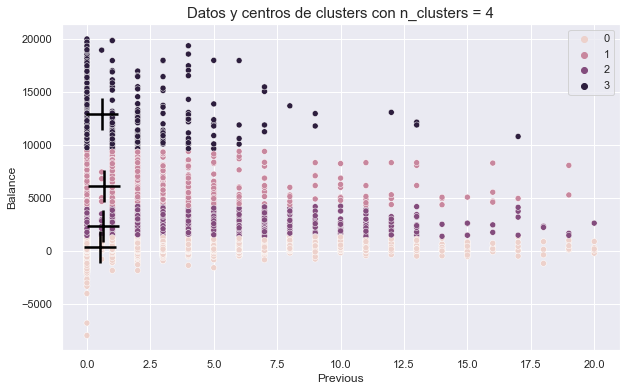

In [15]:
#Repetimos el gráfico pero ahora con la variable Balance y la variable Previous (que se refiere a la cantidad de veces
# que el cliente ha sido contactado)
plt.figure(figsize = (10,6))
sns.scatterplot(x = dataset.iloc[:,5],y = dataset.iloc[:,1], hue = etiquetas_)
sns.scatterplot(x = centros_[:, 5],y = centros_[:, 1],color='black', marker="+", s=1000)
plt.title('Datos y centros de clusters con n_clusters = 4', fontsize = 15)
plt.xlabel('Previous')
plt.ylabel('Balance')
plt.show()

En este gráfico vemos informacion similar al anterior, los 4 grupos se dividen principalmente dependiendo del balance de los clientes, y con respecto a la variable Previous, que se refiere a la cantidad de veces que el banco ha contactado al cliente, podemos decir que al cluster que se caracteriza por tener el mayor balance es al que menos han contactado. 

#### Pruebo con n_clusters = 3

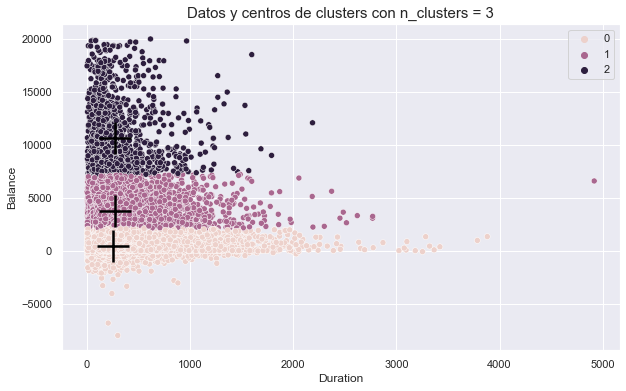

In [16]:
kmeans = KMeans(n_clusters=3)
kmeans = kmeans.fit(dataset)

# Obtengo la posición de los centros y las etiquetas
etiquetas_ = kmeans.labels_
centros_ = kmeans.cluster_centers_

# Grafico con dos variables: En este caso elijo ver las variables balance y duration que son las que tienen 
# informacion que puede servirme para entender la distribucion de los grupos 
plt.figure(figsize = (10,6))
sns.scatterplot(x = dataset.iloc[:,4],y = dataset.iloc[:,1], hue = etiquetas_)
sns.scatterplot(x = centros_[:, 4],y = centros_[:, 1],color='black', marker="+", s=1000)
plt.title('Datos y centros de clusters con n_clusters = 3', fontsize = 15)
plt.xlabel('Duration')
plt.ylabel('Balance')
plt.show()

En este caso, el grupo 1 y 2 del modelo anterior se unen en un único cluster, el número 1. 
Las caracteristicas de cada grupo son similares al caso anterior:
Grupo 0, son aquellos con menor balance, desde negativos hasta los EU 2000 aproximadamente, y son los que tienen más duración en su contacto con el banco. 
El grupo 1, representa a aquellos con un balance entre EU 2000 y EU 7000, con duración de llamadas menor que el grupo anterior. 
Por último, el grupo 2, está conformado por los individuos con mayor balance y menor duración de sus llamadas con el banco. 

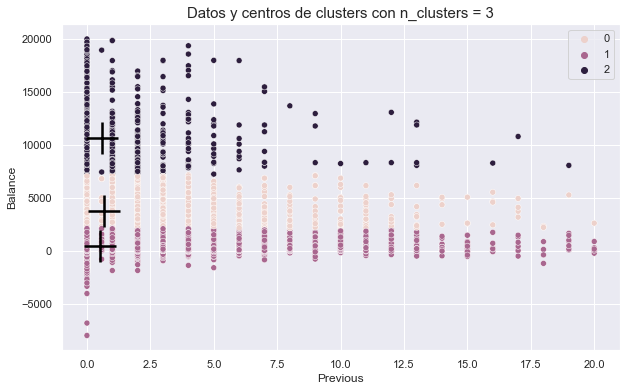

In [72]:
#Repetimos el gráfico pero ahora con la variable Balance y la variable Previous (que se refiere a la cantidad de veces
# que el cliente ha sido contactado)
plt.figure(figsize = (10,6))
sns.scatterplot(x = dataset.iloc[:,5],y = dataset.iloc[:,1], hue = etiquetas_)
sns.scatterplot(x = centros_[:, 5],y = centros_[:, 1],color='black', marker="+", s=1000)
plt.title('Datos y centros de clusters con n_clusters = 3', fontsize = 15)
plt.xlabel('Previous')
plt.ylabel('Balance')
plt.show()

Este gráfico no muestra más información que el anterior, los grupos se dividen principalmente dependiendo del balance del cliente, y con respecto a la variable Previous también se observa que aquellos clientes con mas balance son a los que menos han contactado.
Esto puede deberse a que son clientes nuevos que no han depositado aún todo su dinero en el banco y por eso se los contacta más seguido, para intentar captarlos. 

Ahora aplico SVD para poder reducir la dimension del data set a dos variables, y aplicar los metodos de agregación y poder visualizar en un gráfico los clusters que se forman teniendo en cuenta la influencia de todas las variables.   
Voy a elegir 3 clusters ya que agregar uno más nos mostró que no agrega información.

In [17]:
from sklearn.decomposition import TruncatedSVD
svd_28 =  TruncatedSVD(n_components = 27)
X_SVD_28 = svd_28.fit_transform(X)
print('Porcentajes de varianza explicada por los 28 componentes: ',sum(svd_28.explained_variance_ratio_ * 100))

Porcentajes de varianza explicada por los 28 componentes:  99.99999999999979


In [18]:
print(svd_28.explained_variance_ratio_ * 100)

[9.39958520e+00 7.70360443e+00 6.59132028e+00 5.48137695e+00
 5.03079635e+00 4.69108229e+00 4.23752092e+00 4.17067756e+00
 4.04119883e+00 3.97941361e+00 3.88004944e+00 3.78561386e+00
 3.70852373e+00 3.66828260e+00 3.60869805e+00 3.47882528e+00
 3.30812460e+00 3.23660598e+00 3.18619033e+00 3.11137578e+00
 2.95978189e+00 2.66386404e+00 2.50977001e+00 1.56771797e+00
 1.19975721e-30 1.41302245e-30 5.67107473e-31]


In [19]:
var_acum = np.cumsum(svd_28.explained_variance_ratio_ * 100) 
print(var_acum)

[  9.3995852   17.10318963  23.69450992  29.17588687  34.20668322
  38.89776551  43.13528643  47.30596399  51.34716282  55.32657643
  59.20662587  62.99223973  66.70076346  70.36904606  73.97774411
  77.45656939  80.76469399  84.00129997  87.1874903   90.29886608
  93.25864797  95.92251201  98.43228203 100.         100.
 100.         100.        ]


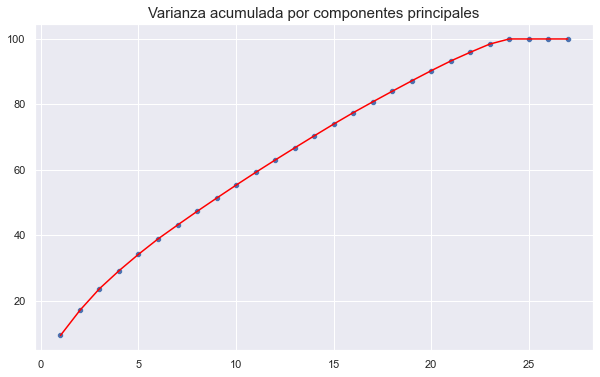

In [20]:
#Realizo un grafico de la varianza acumulada a medida que aumentan los componentes principales 
plt.figure(figsize = (10,6))
sns.scatterplot(x = np.arange(1, 28), y = var_acum)
sns.lineplot(x = np.arange(1, 28), y = var_acum, color = 'red')
plt.title('Varianza acumulada por componentes principales', fontsize = 15)
plt.show()

Vemos que los componentes contienen el 90% de la varianza de los datos a partir del componente numero 20. 
Pero para poder aplicar un algoritmo de tipo clustering de forma de poder tener una vision mas general del dataset y los grupos que se pueden crear dentro del mismo, vamos a quedarnos unicamente con 2 de los componentes principales, para poder verlo gráficamente. 

In [21]:
svd_2 =  TruncatedSVD(n_components = 2)
X_SVD_2 = svd_2.fit_transform(X)

In [22]:
#Analizo cómo están conformados los 2 componentes principales, es decir cómo se relacionan con las variables originales del dataset 
componentes = svd_2.components_.T
#componentes

In [23]:
componentes = pd.DataFrame(componentes, columns = ['component1', 'component2']).sort_values(by = 'component1', ascending = False)
componentes['Variable'] = columns_X
componentes

,component1,component2,Variable
23,0.485725,-0.208920,default
10,0.398484,-0.224253,balance
25,0.342690,0.156964,housing
20,0.197616,0.359783,loan
5,0.097408,0.061757,duration
1,0.086483,-0.083574,previous
14,0.070729,0.141040,job_admin.
12,0.055039,-0.033541,job_blue-collar
18,0.017642,0.102635,job_entrepreneur
8,0.015518,-0.058168,job_housemaid


Vemos que el componente 1 tiene una correlacion de casi 0,5 con la variable default y 0,4 con balance, es decir cuando estas variables aumentan en 1, la componente1 aumenta en 0,5 y 0,4 respectivamente. 

In [24]:
componentes.sort_values(by = 'component2', ascending = False)

,component1,component2,Variable
22,-0.305197,0.465434,contact_telephone
20,0.197616,0.359783,loan
15,0.015321,0.227506,job_management
6,-0.070980,0.214260,marital_single
13,-0.112206,0.158036,education_primary
25,0.342690,0.156964,housing
14,0.070729,0.141040,job_admin.
18,0.017642,0.102635,job_entrepreneur
5,0.097408,0.061757,duration
3,-0.060537,0.043409,marital_divorced


En cuanto al componente 2, la correlación principal se da con la variable contact_telephone, cuando esta aumenta en 1 unidad, la componente2 aumenta en 0,5.
Tambien vemos una correlación de aproximadamente 0,4 con la variable loan

#### Vuelvo a aplicar algoritmo K-Means pero ahora utilizando los 2 componentes principales devueltos por el metodo SVD de reducción de dimensionalidad.
Como mencioné antes, este algoritmo agrupa los datos minimizando el criterio de 'inertia' o 'la suma de cuadrados dentro del cluster':
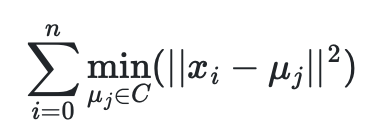

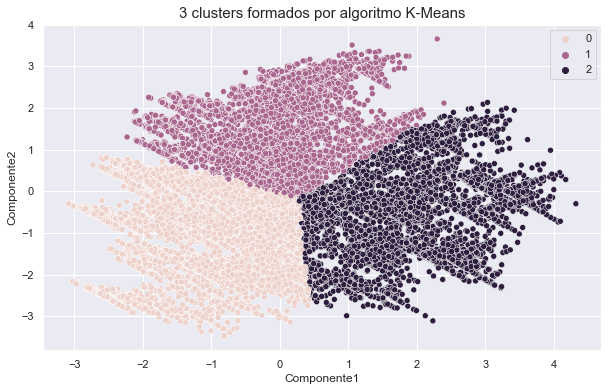

In [25]:
kmeans = KMeans(n_clusters = 3)
kmeans = kmeans.fit(X_SVD_2)

# Obtengo la posición de los centros y las etiquetas
etiquetas_ = kmeans.labels_
#centros_ = kmeans.cluster_centers_

# Grafico con dos variables
plt.figure(figsize = (10,6))
sns.scatterplot(x = X_SVD_2[:,0],y = X_SVD_2[:,1], hue = etiquetas_)
plt.title('3 clusters formados por algoritmo K-Means', fontsize = 15)
plt.ylabel('Componente2')
plt.xlabel('Componente1')
plt.show()

El gráfico anterior es resultado de aplicar el modelo de clustering K-Means al dataset formado únicamente por los dos componentes principales luego de aplicar SVD y eligiendo 3 numero de clusters.
Teniendo en cuenta lo analizado anteriormente, podemos decir que los valores mas altos del componente 1 corresponden a individuos con créditos en mora, o con préstamos de vivienda/personales y con alto balance. Valores negativos de este componente estan relacionados con la forma de contactar al individuo. 
Altos valores del componente 2 se relacionan con individuos que han sido contactados por telefono por parte del banco y que han tomado creditos personales. Valores menores a 0 del componente 2 estan relacionados con individuos de los cuales se desconoce el nivel de educación alcanzado o han alcanzado un nivel terciario. 

#### Como segundo algoritmo, selecciono el Agglomerative Clustering con métrica de distancia 'euclidean'

Este algoritmo pertenece a la categoría de modelos de clustering jerárquico, específicamente aglometarivos, ya que para construir los grupos lo hace de forma ascendente: Inicialmente cada punto se considera como un cluster individual, y en cada iteración los puntos similares se van aglomerando en un unico cluster hasta formar un grupo n de clusters.  
La métrica de similitud o distancia entre puntos que utiliza es la distancia euclidiana, la cual se calcula a partir del teorema de pitágoras y tiene la siguiente definición:
En un espacio bidimensional, la distancia euclidiana entre dos puntos P y Q, de coordenadas cartesianas (px, py) y (qx, qy) respectivamente, es:

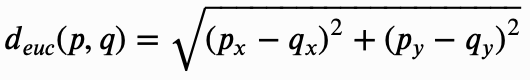

In [26]:
from sklearn.cluster import AgglomerativeClustering

Vamos a crear un objeto AgglomerativeClustering el cual 

In [ ]:
agl = AgglomerativeClustering(n_clusters = 3, linkage = 'average', affinity = 'euclidean')
agl = agl.fit(X_SVD_2)

In [52]:
etiquetas1_ = agl.labels_

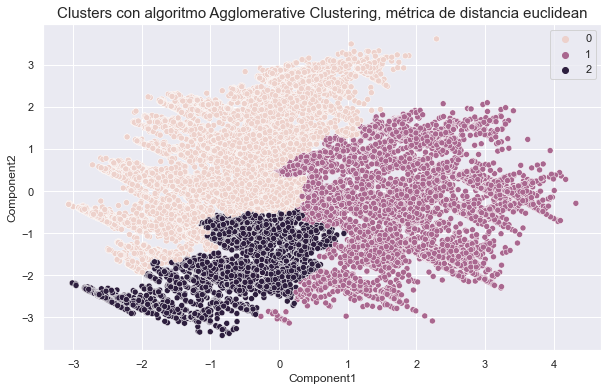

In [56]:
plt.figure(figsize = (10,6))
sns.scatterplot(x = X_SVD_2[:,0],y = X_SVD_2[:,1], hue = etiquetas1_)
plt.xlabel('Component1')
plt.ylabel('Component2')
plt.title('Clusters con algoritmo Agglomerative Clustering, métrica de distancia euclidean', fontsize = 15)
plt.show()

Vemos que con el algoritmo aglomerativo se forman 3 grupos similares a los obtenidos con el modelo K-means. 
Pero en este caso,el grupo 0 en este caso abarca todos los valores positivos del componente 2 y, a diferencia del caso anterior, también abarca algunos valores negativos. Lo que hace que el grupo 2 este mas concentrado en los valores negativos de los dos componentes. 

#### Aplico nuevamente el algoritmo Agglomerative Clustering, pero en este caso con métrica de distancia 'cosine'

Para determinar la distancia entre dos puntos, este método utiliza el ángulo que se forma entre los vectores formados por dichos puntos. Cuanto más chico sea el angulo, mas cerca estan los puntos, el caso extremo de que el ángulo que formen sea 0, el cos(0) = 1, si son perpendiculares, es decir forman un angulo de 90, el cos(90) = -1. 
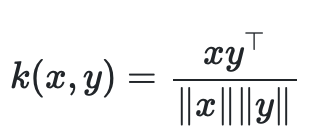

In [57]:
agl2 = AgglomerativeClustering(n_clusters = 3, linkage = 'average', affinity = 'cosine')
agl2 = agl2.fit(X_SVD_2)

In [59]:
etiquetas2_ = agl2.labels_

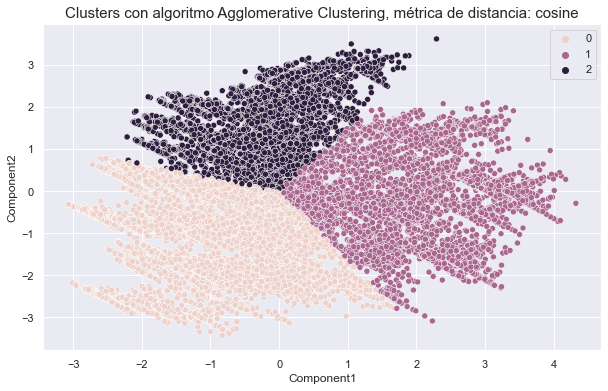

In [60]:
plt.figure(figsize = (10,6))
sns.scatterplot(x = X_SVD_2[:,0],y = X_SVD_2[:,1], hue = etiquetas2_)
plt.xlabel('Component1')
plt.ylabel('Component2')
plt.title('Clusters con algoritmo Agglomerative Clustering, métrica de distancia: cosine', fontsize = 15)
plt.show()

Los cluster que se forman al utilizar el algoritmo Agglomerative clustering tomando como métrica de distancia la similitud coseno es muy similar a la que obtenemos con K-Means. 

#### Aplico nuevamente el algoritmo Agglomerative Clustering, pero en este caso con métrica de distancia 'manhattan'.
Esta métrica de similitud define la distancia entre dos puntos p y q, como la sumatoria de las diferencias absolutas entre cada dimensión. Esta medida se ve menos afectada por outliers (es más robusta) que la distancia euclídea debido a que no eleva al cuadrado las diferencias.
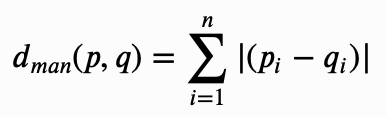

In [80]:
agl3 = AgglomerativeClustering(n_clusters = 3, linkage = 'average', affinity = 'manhattan')
agl3 = agl3.fit(X_SVD_2)

In [81]:
etiquetas3_ = agl3.labels_

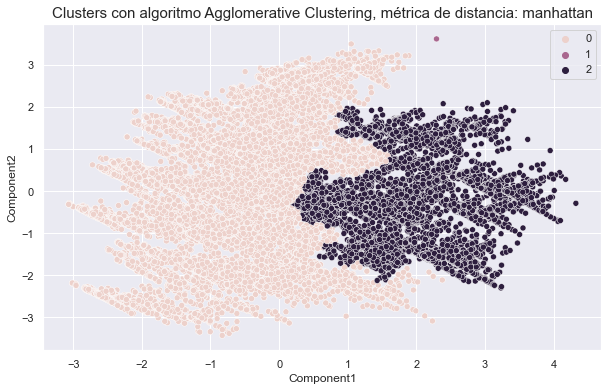

In [88]:
plt.figure(figsize = (10,6))
sns.scatterplot(x = X_SVD_2[:,0],y = X_SVD_2[:,1], hue = etiquetas3_)
plt.xlabel('Component1')
plt.ylabel('Component2')
plt.title('Clusters con algoritmo Agglomerative Clustering, métrica de distancia: manhattan', fontsize = 15)
plt.show()

Vemos que los cluster que se formaron usando el algoritmo de algomeración con métrica Manhattan son muy distintos a los anteriores, en este caso se forman dos grandes grupos, el grupo 1 es practicamente descartado ya que solo está formado por un punto. 
El grupo 0 esta representado por todos los valores de la componentes 2 y por los valores negativos de la componente 1, estos estan relacionados principalmente con el medio a traves del cual el banco se contacta con los clientes.  
El grupo 2 está formado principalmente por valores positivos de la componente 1 y se centra alrededor del 0 de la componente 2, puede que los individuos de este grupo sean aquellos con mayor balance, y que ademas tengan créditos hipotecarios o personales, ademas de alguna deuda en el banco. 

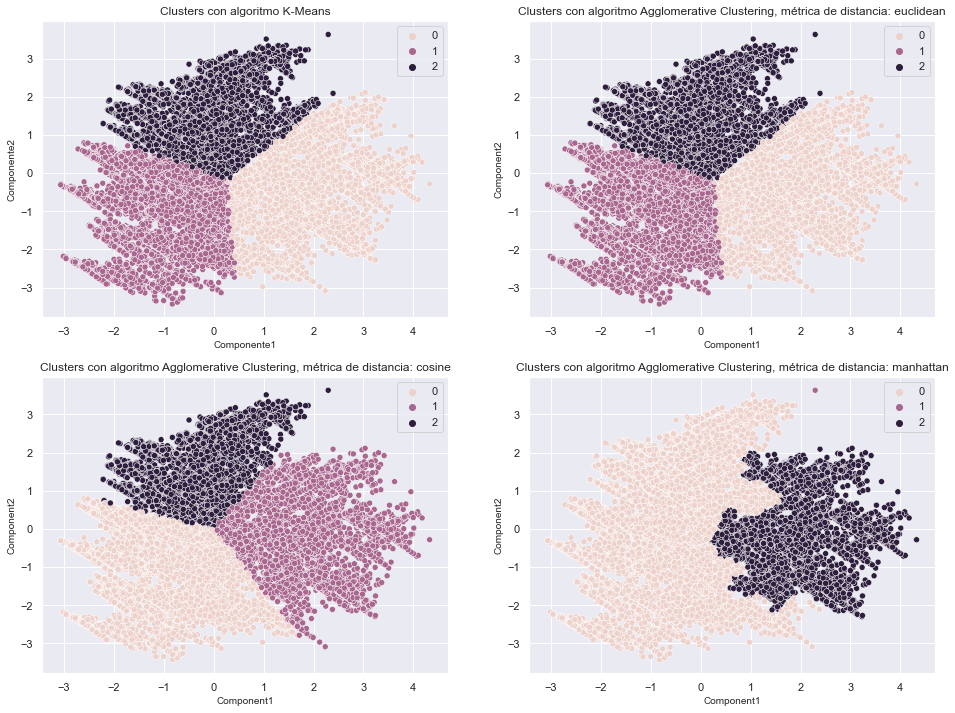

In [87]:
plt.figure(figsize = (16,12))
plt.subplot(2,2,1)
sns.scatterplot(x = X_SVD_2[:,0],y = X_SVD_2[:,1], hue = etiquetas_)
plt.title('Clusters con algoritmo K-Means', fontsize = 12)
plt.xlabel('Componente1', fontsize = 10)
plt.ylabel('Componente2', fontsize = 10)
plt.subplot(2,2,2)
sns.scatterplot(x = X_SVD_2[:,0],y = X_SVD_2[:,1], hue = etiquetas_)
plt.xlabel('Component1', fontsize = 10)
plt.ylabel('Component2', fontsize = 10)
plt.title('Clusters con algoritmo Agglomerative Clustering, métrica de distancia: euclidean', fontsize = 12)
plt.subplot(2,2,3)
sns.scatterplot(x = X_SVD_2[:,0],y = X_SVD_2[:,1], hue = etiquetas2_)
plt.xlabel('Component1', fontsize = 10)
plt.ylabel('Component2', fontsize = 10)
plt.title('Clusters con algoritmo Agglomerative Clustering, métrica de distancia: cosine', fontsize = 12)
plt.subplot(2,2,4)
sns.scatterplot(x = X_SVD_2[:,0],y = X_SVD_2[:,1], hue = etiquetas3_)
plt.xlabel('Component1', fontsize = 10)
plt.ylabel('Component2', fontsize = 10)
plt.title('Clusters con algoritmo Agglomerative Clustering, métrica de distancia: manhattan', fontsize = 12)
plt.show()

Este gráfico es un resumen de los métodos de agregación utilizados y sus métricas de similitud para formar los clusters. 
A modo de resumen, los clusters formados por el metodo K-Means y AgglomerativeClustering - con métrica coseno son los más parecidos. 

####  3. Reglas de asociación

Podemos intentar encontrar reglas de asociación que nos brinde información acerca de los individuos que forman parte de la base de datos de forma de poder tener asociaciones entre aquellos que han depositado su dinero a plazo en el banco y asi poder tener en cuenta esas características para que la campaña de marketing vaya dirigida principalmente a ellos. 

Voy a crear una columna que sea un identificador de cada individuo, luego voy a separar los datos entre aquellos que han hecho un deposito a plazo y los que no, y me voy a quedar con informacion sorbre: su trabajo, su estado civil y su nivel educativo. 
De forma de crear un set de reglas que indiquen la relacion entre esas tres variables y si hacen un posito a plazo o no. 

In [2]:
from mlxtend.frequent_patterns import apriori, association_rules

In [3]:
%store -r data

In [4]:
data['id'] = range(1, len(data) + 1)

#### Voy a separar los datos entre los clientes que hicieron un depósito a plazo y los que no

In [59]:
#Los que si hicieron un deposito a plazo
deposit = []
deposit = data[data['y'] == 'yes']
deposit = deposit[['job','marital','education']]
deposit.head()

,job,marital,education
83,admin.,married,secondary
86,admin.,married,secondary
87,technician,married,secondary
129,services,married,secondary
168,admin.,married,tertiary


In [60]:
#Convierto las variables categoricas a numericas con la funcion get_dummies
deposit_ = pd.get_dummies(data=deposit, columns=['job', 'marital', 'education'])
deposit_.head()

,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown
83,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
86,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
87,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0
129,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0
168,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0


In [67]:
frq_items = apriori(deposit_, min_support = 0.1, use_colnames = True)
frq_items.head()

,support,itemsets
0,0.119304,(job_admin.)
1,0.133863,(job_blue-collar)
2,0.245982,(job_management)
3,0.158820,(job_technician)
4,0.117603,(marital_divorced)


Generaremos un set de reglas con diferente soporte, confianza y lift. 
* El soporte indica cuantas veces se han encontrado las reglas en el dataset, cuanto más alto mejor. 
* La confianza habla de la probabilidad de ocurrencia de que un hecho se de en función de otro. 
* El lift es un parámetro que nos indica cuánto de aleatoriedad hay en las reglas. Un lift de 1 o menos es que las reglas son completamente fruto del azar.

In [68]:
rules = association_rules(frq_items, metric ="lift", min_threshold = 0.7)
rules = rules.sort_values(['support'], ascending =[False])
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
4,(education_secondary),(marital_married),0.463226,0.520892,0.246549,0.532245,1.021794,0.005259,1.024270
5,(marital_married),(education_secondary),0.520892,0.463226,0.246549,0.473321,1.021794,0.005259,1.019169
2,(job_management),(education_tertiary),0.245982,0.377387,0.214407,0.871637,2.309664,0.121577,4.850416
3,(education_tertiary),(job_management),0.377387,0.245982,0.214407,0.568136,2.309664,0.121577,1.745962
6,(education_tertiary),(marital_married),0.377387,0.520892,0.172622,0.457415,0.878137,-0.023956,0.883009


Ordenando las reglas por support, vemos que:
* La relación más frecuente de los clientes que tienen un depósito a plazo en el banco es: educacion secundaria -> casados, esto se da en el 25% de los clientes.
* Con un lift de 2,3 y una confianza del 87% podemos decir que las personas que tienen un trabajo del area management han llegado al nivel de educación terciaria. Es decir que la probabilidad de que un individuo (que tiene un credito en el banco) tenga un trabajo de management y tenga estudios terciarioz es 2,3 veces mas probable a que solo tenga ese empleo sin haber llegado a ese nivel de educación. Ademas esta relacion se da en el 21,4% de los casos.

In [72]:
rules = rules.sort_values(['confidence'], ascending =[False])
rules.head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
2,(job_management),(education_tertiary),0.245982,0.377387,0.214407,0.871637,2.309664,0.121577,4.850416
13,"(job_management, marital_married)",(education_tertiary),0.128758,0.377387,0.106447,0.826725,2.190657,0.057856,3.593216
14,"(education_tertiary, marital_married)",(job_management),0.172622,0.245982,0.106447,0.616648,2.506882,0.063985,1.966909
3,(education_tertiary),(job_management),0.377387,0.245982,0.214407,0.568136,2.309664,0.121577,1.745962
4,(education_secondary),(marital_married),0.463226,0.520892,0.246549,0.532245,1.021794,0.005259,1.024270
0,(job_management),(marital_married),0.245982,0.520892,0.128758,0.523444,1.004898,0.000628,1.005353
12,"(job_management, education_tertiary)",(marital_married),0.214407,0.520892,0.106447,0.496473,0.953119,-0.005236,0.951503
5,(marital_married),(education_secondary),0.520892,0.463226,0.246549,0.473321,1.021794,0.005259,1.019169
10,(marital_single),(education_tertiary),0.361505,0.377387,0.166383,0.460251,1.219573,0.029956,1.153523
6,(education_tertiary),(marital_married),0.377387,0.520892,0.172622,0.457415,0.878137,-0.023956,0.883009


Ordenando las reglas por confianza, vemos que:
* De los individuos que tienen credito a plazo en el banco, quienes están casados y tienen un empleo de tipo management, hay un 87% que en cuanto a la educación ha llegado a completar el nivel terciario. 
* De los individuos que tienen un credito a plazo en el banco y están solteros, el 46% de ellos han completado la educación terciaria. 

#### Aplico el mismo modelo para obtener reglas de asociación del grupo de clientes que no tiene un depósito a plazo en el banco

In [58]:
#Los que si hicieron un deposito a plazo
nodeposit = []
nodeposit = data[data['y'] == 'no']
nodeposit = nodeposit[['job','marital','education']]
nodeposit.head()

,job,marital,education
0,management,married,tertiary
1,technician,single,secondary
2,entrepreneur,married,secondary
3,blue-collar,married,unknown
4,unknown,single,unknown


In [62]:
#Convierto las variables categoricas a numericas con la funcion get_dummies
nodeposit_ = pd.get_dummies(data=nodeposit, columns=['job', 'marital', 'education'])
nodeposit_.head()

,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown
0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0
2,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
3,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1


In [65]:
frq_items2 = apriori(nodeposit_, min_support = 0.1, use_colnames = True)
frq_items2.head()

,support,itemsets
0,0.113722,(job_admin.)
1,0.226041,(job_blue-collar)
2,0.204323,(job_management)
3,0.169255,(job_technician)
4,0.114849,(marital_divorced)


In [66]:
rules2 = association_rules(frq_items2, metric ="lift", min_threshold = 0.7)
rules2 = rules2.sort_values(['support'], ascending =[False])
rules2.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
13,(marital_married),(education_secondary),0.612670,0.519814,0.312259,0.509669,0.980485,-0.006215,0.979311
12,(education_secondary),(marital_married),0.519814,0.612670,0.312259,0.600713,0.980485,-0.006215,0.970055
6,(job_management),(education_tertiary),0.204323,0.283177,0.167001,0.817335,2.886302,0.109141,3.924244
7,(education_tertiary),(job_management),0.283177,0.204323,0.167001,0.589739,2.886302,0.109141,1.939440
0,(marital_married),(job_blue-collar),0.612670,0.226041,0.163594,0.267018,1.181284,0.025106,1.055905


Ordenando las reglas por nivel de soporte, vemos que de los individuos que aún no tienen un depósito en el banco:
* El 31% de ellos están casados y han llegado al nivel de educación secundario, al ser el lift cercano a 1 esta regla no deberīa considerarse ya que puede ser resultado del azar. 
* El 16% tiene un empleo de tipo management y ha completado el nivel de educación terciario. En este caso tiene un lift de 2,9, es decir que la probabilidad de que se den las dos opciones es 3 veces mas que la probabilidad de que se den solas. 
* El 16% está casado y con un trabajo del tipo 'blue-collar', en este caso el lift es de 1,2


In [73]:
rules2 = association_rules(frq_items2, metric ="lift", min_threshold = 0.7)
rules2 = rules2.sort_values(['confidence'], ascending =[False])
rules2.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
6,(job_management),(education_tertiary),0.204323,0.283177,0.167001,0.817335,2.886302,0.109141,3.924244
11,(education_primary),(marital_married),0.156806,0.612670,0.121487,0.774760,1.264565,0.025417,1.719637
1,(job_blue-collar),(marital_married),0.226041,0.612670,0.163594,0.723737,1.181284,0.025106,1.402033
9,(job_technician),(education_secondary),0.169255,0.519814,0.118005,0.697203,1.341256,0.030024,1.585835
12,(education_secondary),(marital_married),0.519814,0.612670,0.312259,0.600713,0.980485,-0.006215,0.970055


Ordenando las reglas por confianza, podemos mencionar algunas más sobre los individuos que aún no tienen depósito a plazo en el banco:
* De los que han completado la educación terciaria, el 82% tiene un empleo de tipo management
* De los que han completado el nivel de educación primaria, el 77% está casado.
* De los que han llegado al nivel de educación secundaria, el 70% tiene un trabajo de tipo técnico. 

Esta informacion que obtenemos de las reglas de asociación puede servir al departamento de marketing para conocer el perfil de los clientes que tienen un deposito en el banco y los que no, ya que el objetivo de la campaña es atraer más clientes y retener a los actules, conociendo cuáles son las principales relaciones que se dan entre ellos pueden salir a buscar más clientes con caracteristicas similares o fijarse cuáles son las caracteristicas de los clientes que tienen con menor frecuencia, analizar por qué puede darse y reforzar alguna cuestión para intentar captar ese grupo que no se está logrando. 
En este caso yo sólo utilicé 3 caracteristicas de los clientes del dataset, pero podrían armarse reglas con todas las características que haya disponible. 

#### 4. Aplicar un modelo de generación de reglas a partir de árboles de decisión sin y con opciones de poda y comparar los resultados.

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state = 42, stratify = y)

Aplico un modelo de árbol de decisión usando el modelo RandomizedSearch CV para optimizar el hiperparámetro max_deph y aplicar cross validation para minimizar el overfitting

In [10]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score, recall_score, precision_score, make_scorer
import sklearn.metrics as metrics

tree = DecisionTreeClassifier(random_state=42)

# Random Search
model = RandomizedSearchCV(tree,param_distributions={'max_depth': np.arange(2, 16)}, cv=5, refit=True)

model.fit(X_train, y_train)

print("Mejores parametros: "+str(model.best_params_))
print("Mejor Score: "+str(model.best_score_)+'\n')

#Hago las predicciones con el modelo 
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)


precision_train = metrics.precision_score(y_train, y_train_pred)
precision_test = metrics.precision_score(y_test, y_test_pred)

print('Precision Train: ',precision_train)

print('Precision Test: ',precision_test)

Mejores parametros: {'max_depth': 5}
Mejor Score: 0.8922488946665179

Precision Train:  0.577927548441449
Precision Test:  0.5417095777548918


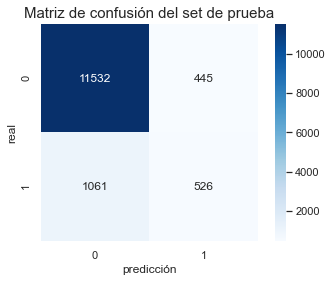

In [88]:
from sklearn.metrics import confusion_matrix

matrix = confusion_matrix(y_test, y_test_pred)
sns.heatmap(matrix, annot=True, fmt="d", cmap='Blues', square=True)
plt.title('Matriz de confusión del set de prueba', fontsize = 15)
plt.xlabel("predicción")
plt.ylabel("real")
plt.show()

De los 1587 casos de la clase minoritaria que es la que nos interesa predecir bien, es decir aquellos que decidan poner un depósito a plazo en el banco, el modelo sólo pudo clasificar correctamente a 526, es decir al 33%.

In [89]:
from sklearn.metrics import classification_report
report = classification_report(y_test, y_test_pred)
print(report)

              precision    recall  f1-score   support

           0       0.92      0.96      0.94     11977
           1       0.54      0.33      0.41      1587

    accuracy                           0.89     13564
   macro avg       0.73      0.65      0.67     13564
weighted avg       0.87      0.89      0.88     13564



El reporte nos da un resumen de las métricas del modelo que entrenamos, podemos ver que para la clase mayoritaria, que es la clase 0, tiene una precision de 0,92, un recall de 0,96 y un f1-score de 0,94. 
En cuanto a la clase minoritaria, los resultados no son muy buenos, ya que nos da menor a 0,5 en la mayoría de las métricas, lo cual indica que clasifica casi aleatoriamente.
Recall, indica la Tasa de verdaderos positivos Recall = TP/(TP + FN), indica que tan bueno es el modelo para predecir la clase positiva. En este caso nos dio 0,33 lo cual indica que el modelo es muy malo para predecir eso que nos interesa. 
La precisión, es TP/(TP + FP), es decir de todos los que el modelo predijo positivos, cuantos eran realmente positivos? En este caso nos dio la mitad. 

#### Curva ROC: Tasa de verdades positivos  (TPR) vs tasa de verdaderos negativos (FPR)

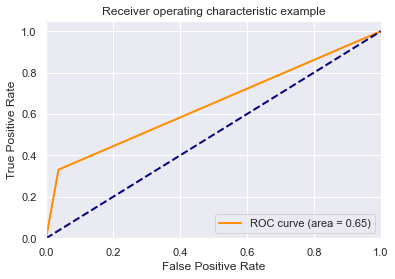

In [90]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_test, y_test_pred)
roc_auc = auc(fpr, tpr)
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

El área debajo de la curva representa la habilidad del modelo para discriminar entre la clase negativa y la positiva. Un área de 1 representa un modelo que ha hecho todas las predicciones perfectas, mientras que un área de 0.5 representa el rendimiento de un modelo aleatorio. En este caso, el area es 0,65. Lo cual esta un poco por encima de ser aleatorio. 

#### Reglas de decisión obtenidas del árbol de decisión

In [28]:
from sklearn.tree import export_text
features = columns_X.tolist()
str_features = [str(int) for int in features]
target = y.unique().tolist()
str_target = [str(int) for int in target]
clf = DecisionTreeClassifier(random_state=42, max_depth = 5)
clf.fit(X_train, y_train)
text_representation = export_text(clf, feature_names = features)
print(text_representation)

|--- duration <= 1.01
|   |--- previous <= 0.15
|   |   |--- duration <= 0.01
|   |   |   |--- housing <= -0.11
|   |   |   |   |--- duration <= -0.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- duration >  -0.50
|   |   |   |   |   |--- class: 0
|   |   |   |--- housing >  -0.11
|   |   |   |   |--- contact_unknown <= 0.47
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- contact_unknown >  0.47
|   |   |   |   |   |--- class: 0
|   |   |--- duration >  0.01
|   |   |   |--- contact_unknown <= 0.47
|   |   |   |   |--- housing <= -0.11
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- housing >  -0.11
|   |   |   |   |   |--- class: 0
|   |   |   |--- contact_unknown >  0.47
|   |   |   |   |--- duration <= 0.83
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- duration >  0.83
|   |   |   |   |   |--- class: 0
|   |--- previous >  0.15
|   |   |--- housing <= -0.11
|   |   |   |--- duration <= -0.37
|   |   |   |   |--- duration <= -0.52
|   |   |   |   |   

En cuanto a las reglas de decisión que creó el modelo podemos ir describiendolas de la siguiente manera:
- Regla 1:
Analiza primero la variable y define que si:
* duration <= 1.01, y 
* previous <= 0.15, y 
* duration <= 0.01, y 
* housing <= -0.11, y 
* duration <= -0.50
* Entonces le corresponde la class: 0

* Pero si duration >  -0.50, 
* Entonces también le corresponde la class: 0

Y asi sucesivamente con las siguientes reglas. 

#### Estructura gráfica del árbol de decisión

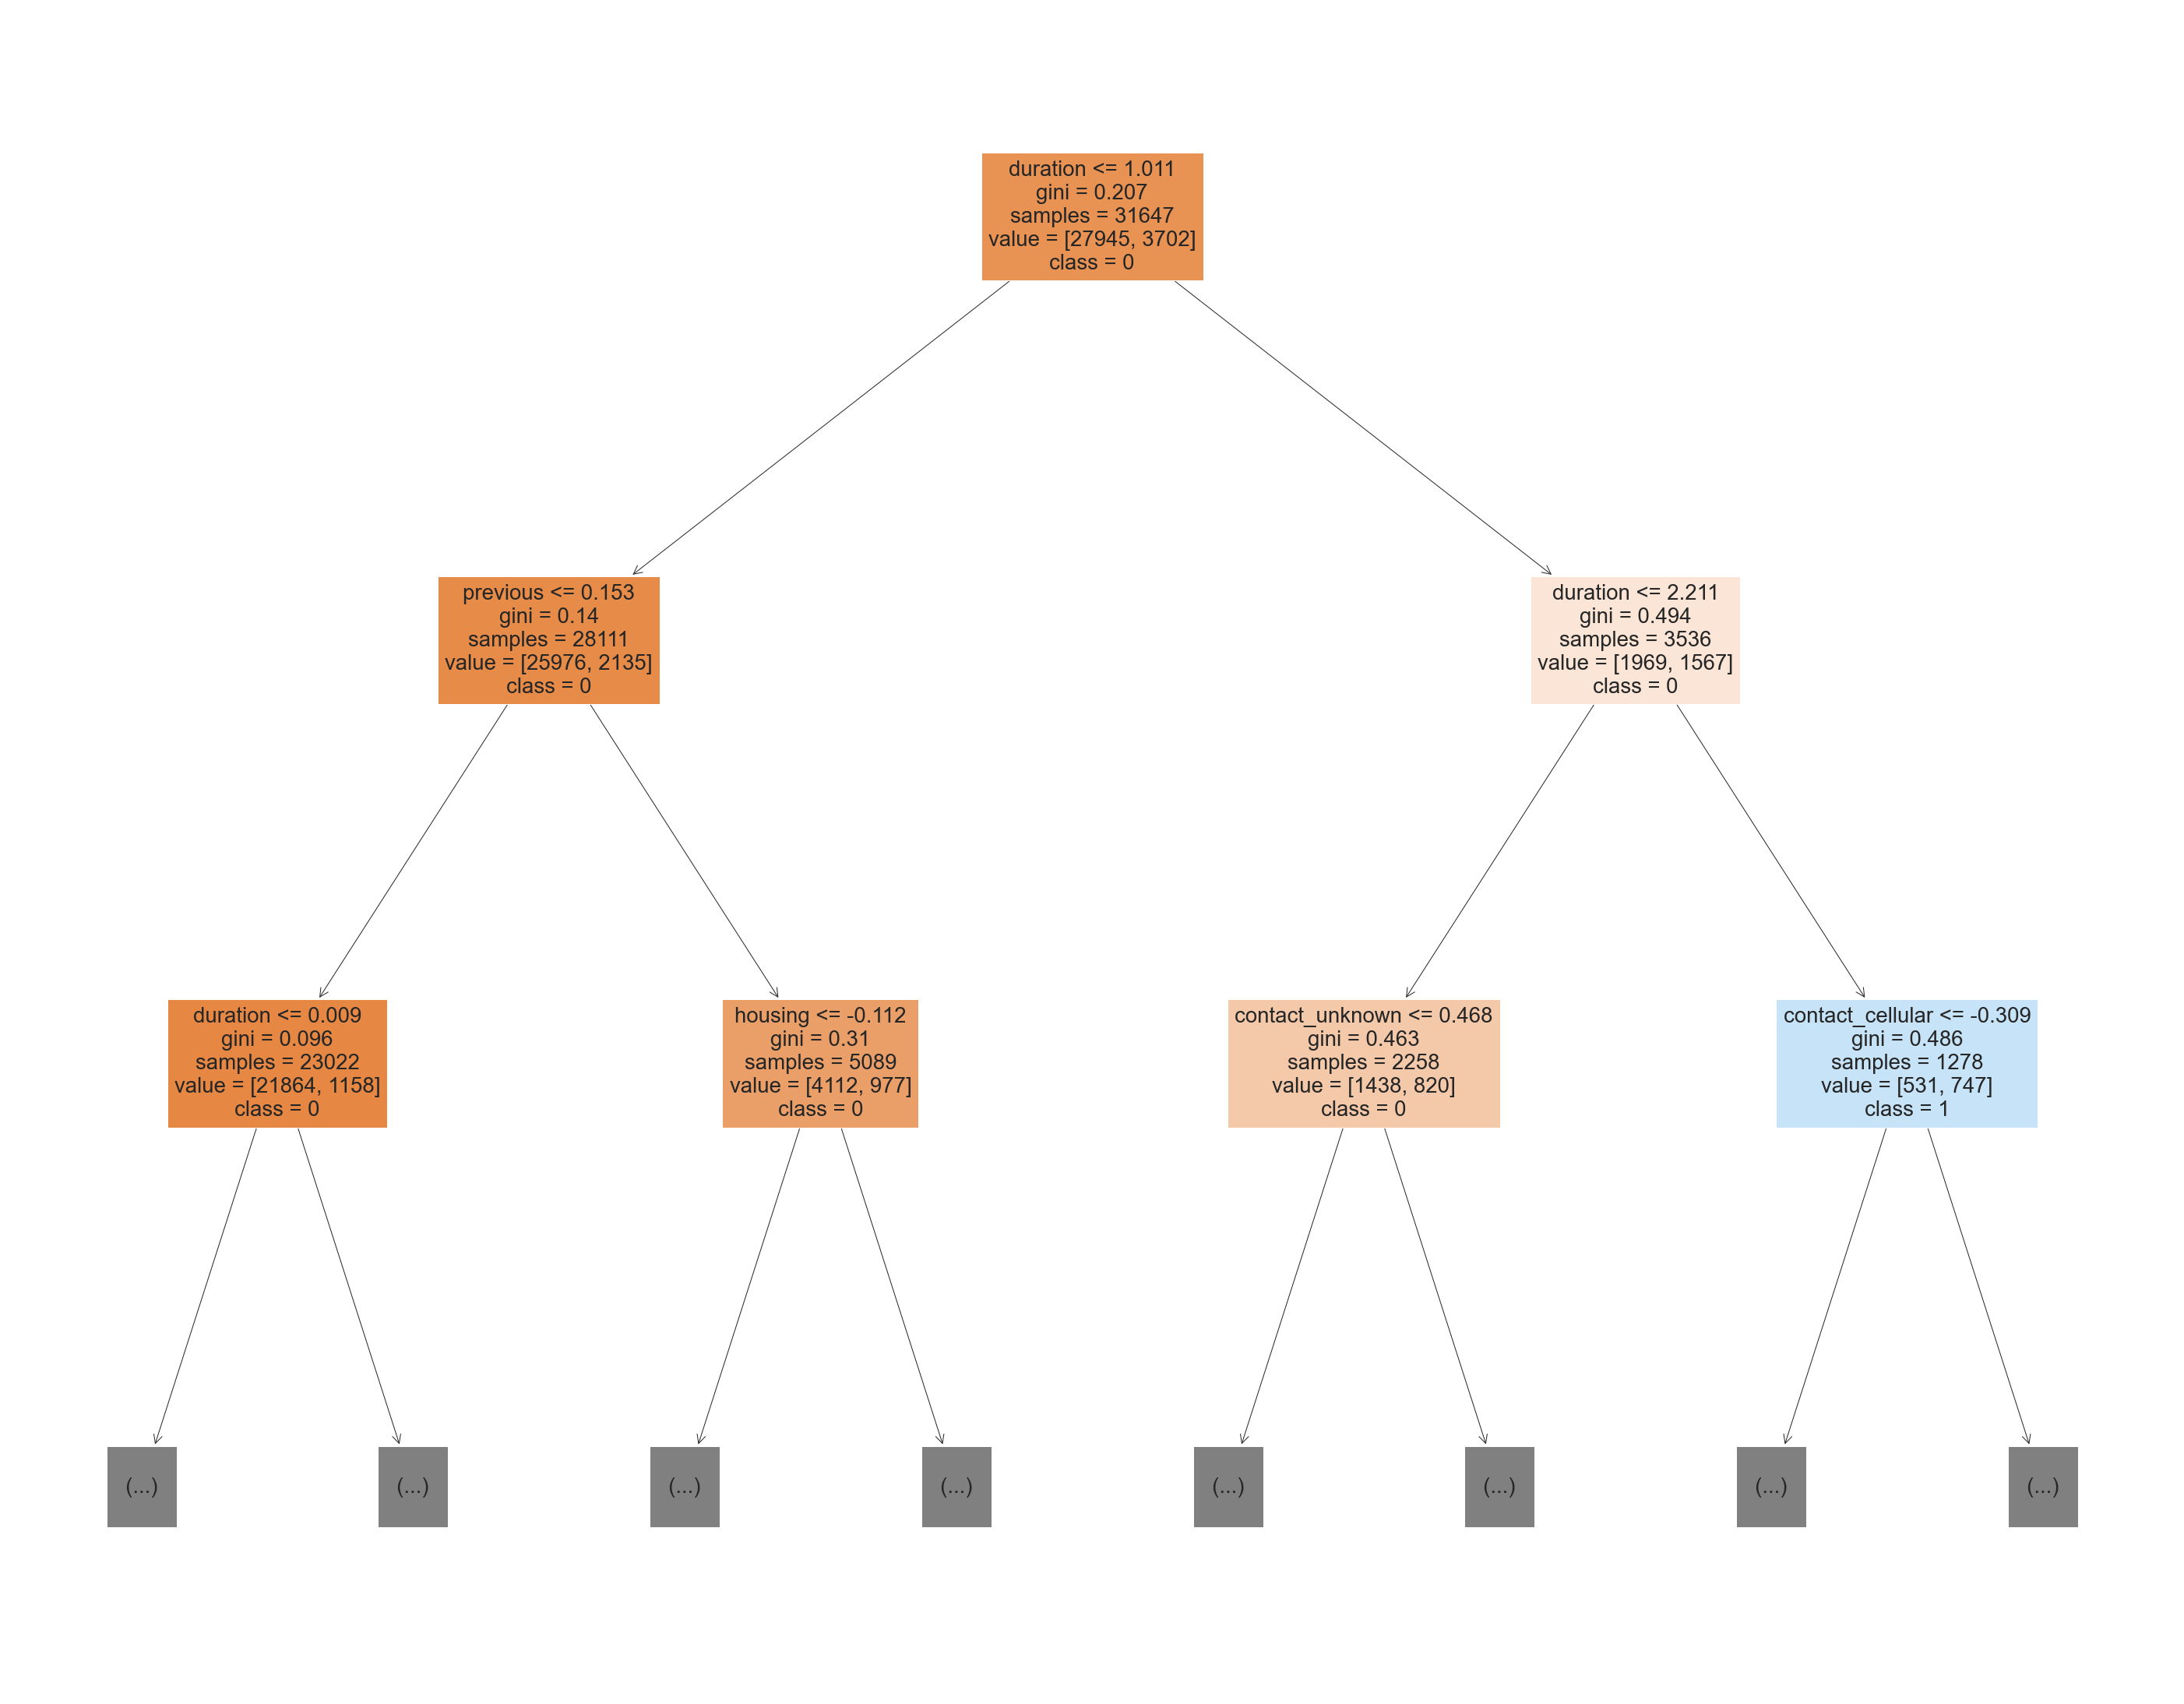

In [98]:
from sklearn import tree
fig = plt.figure(figsize=(50,40))
_ = tree.plot_tree(clf, 
                   feature_names=str_features,  
                   class_names=str_target,
                   filled=True,
                  max_depth = 2)

En el grafico de arriba vemos la estructura del árbol de decisión, es otra forma de ver las reglas generadas por el modelo, donde en cada nodo de decisión realiza el cálculo del índice Gini, el cual lo podemos entender como una función de costo utilizada para evaluar divisiones en el conjunto de datos, esta medida establece que el mejor separador es aquel que reduce la diversidad de las particiones.  
Vemos que como primer nodo selecciona la variable 'duration' <= 1.011, y a partir de aqui realiza la primera partición de los datos, dividiendo el dataset por esta variable obtiene un valor Gini de 0.207, el cual es el mínimo valor que obtuvo por eso seleccionó este atributo para comenzar. 
Luego, el dataset se divide en dos grupos teniendo en cuenta la condición anterior, y en cada uno de estos grupos vuelve a calcular el valor Gini para encontrar el atributo que mejor separe los datos, es decir aquel atributo que reduzca al máximo la diversidad de las siguientes particiones, una vez que se encuentra el mejor separador, éste se convierte en la raiz del árbol y se vuelve a proceder del mismo modo. 
Cuando ya no se encuentren más separadores, el nodo queda como una hoja terminal. 

#### Importancia de los atributos que tomó el modelo

In [100]:
importancia = clf.feature_importances_
label = columns_X
feat_import = {'Atributos': label, 'Importancia': importancia}
data_tree = pd.DataFrame(data=feat_import)
data_tree.sort_values(by = 'Importancia', ascending = False)

,Atributos,Importancia
4,duration,0.688180
2,housing,0.131268
5,previous,0.095888
27,contact_unknown,0.051735
1,balance,0.015803
19,marital_married,0.008245
25,contact_cellular,0.004505
0,default,0.001861
12,job_self-employed,0.001533
24,education_unknown,0.000982


La importancia de cada característica se calcula como la disminución de la impureza del nodo ponderada por la probabilidad de alcanzar ese nodo. La probabilidad del nodo se puede calcular por el número de muestras que llegan al nodo, dividido por el número total de muestras. Cuanto mayor sea el valor, más importante será la característica.
Vemos en el listado que la característica más importante para este modelo, con un 69%, es 'duration', es decir la duración, en segundos, de la última llamada por parte del banco al cliente. 
Seguido por la variable 'housing' pero con un 13%. 

In [27]:
from sklearn.tree._tree import TREE_LEAF

#### Poda del árbol: aplicaremos un método de pospoda, es decir una vez que tenemos el modelo creado, analizamos qué parte del árbol podemos eliminar

'Cost Complexity Pruning', es una opción que brinda la librería sklearn para controlar el tamaño del árbol. Esta técnica de poda está parametrizada por el parámetro de complejidad de costo ccp_alpha.
Los valores más altos de ccp_alpha aumentan el número de nodos podados. 
Vamos a ver cual es el mayor valor de alpha que podemos elegir teniendo en cuenta las métricas de precisión del modelo. 

In [47]:
#En path vamos a guardar los ccp_alphas efectivos y las impurezas totales de las hojas
#correspondientes a cada paso del proceso de poda. 
#A medida que aumenta el alpha, se poda una mayor parte del árbol, lo que
#aumenta la impureza de sus hojas.
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities
print(len(ccp_alphas))
print(len(impurities))

1257
1257


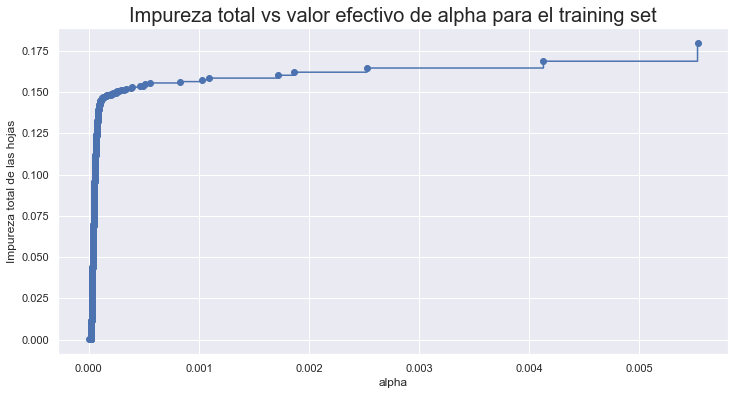

In [53]:
plt.figure(figsize = (12,6))
plt.plot(ccp_alphas[:-1],impurities[:-1], marker='o', drawstyle="steps-post")
plt.xlabel("alpha")
plt.ylabel("Impureza total de las hojas")
plt.title("Impureza total vs valor efectivo de alpha para el training set", fontsize = 20)
plt.show()

A medida que aumentamos el alpha, el árbol se poda más y en consecuencia las hojas tienen mayor impureza ya que en este caso no pueden continuar buscando reglas y dividiendose hasta que todos los datos de cada una pertenezcan a una única clase. 

In [31]:
#Genero un modelo con cada valor de alpha 
clfs = []
for ccp_alpha in ccp_alphas:
    clf = tree.DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)

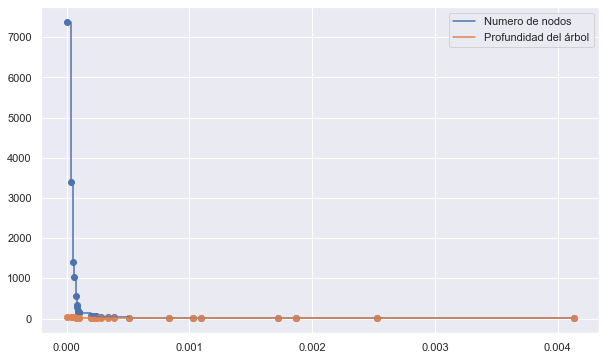

In [33]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]
node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
plt.figure(figsize = (10,6))
plt.scatter(ccp_alphas,node_counts)
plt.scatter(ccp_alphas,depth)
plt.plot(ccp_alphas,node_counts,label='Numero de nodos',drawstyle="steps-post")
plt.plot(ccp_alphas,depth,label='Profundidad del árbol',drawstyle="steps-post")
plt.legend()
plt.show()

A medida que el probamos modelos con mayores valores de alpha, vemos que el numero de nodos y la profundidad del arbol decrecen. 

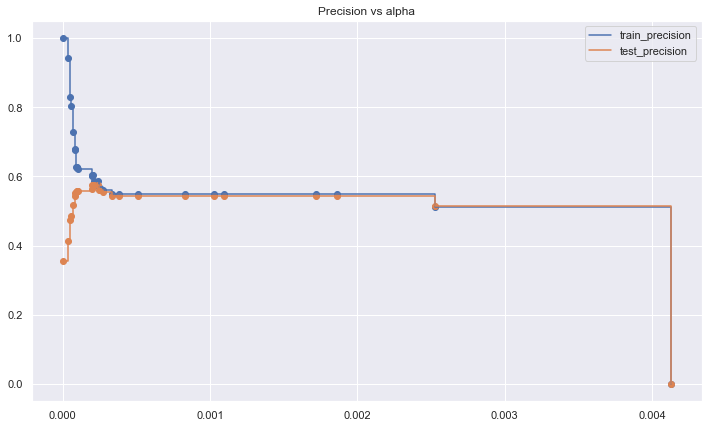

In [38]:
train_prec = []
test_prec = []

for c in clfs:
    y_train_pred = c.predict(X_train)
    y_test_pred = c.predict(X_test)
    train_prec.append(metrics.precision_score(y_train, y_train_pred,labels = np.unique(y_train_pred)))
    test_prec.append(metrics.precision_score(y_test, y_test_pred, labels = np.unique(y_test_pred)))
    
     
plt.figure(figsize = (12,7))
plt.scatter(ccp_alphas,train_prec)
plt.scatter(ccp_alphas,test_prec)
plt.plot(ccp_alphas,train_prec,label='train_precision',drawstyle="steps-post")
plt.plot(ccp_alphas,test_prec,label='test_precision',drawstyle="steps-post")
plt.legend()
plt.title('Precision vs alpha')
plt.show()


Teniendo en cuenta los valores de precision para el Test y el Train, podriamos elegir un modelo con un alpha cercano a 0.002 

In [54]:
clf_ = tree.DecisionTreeClassifier(random_state=0,ccp_alpha=0.002)
clf_.fit(X_train,y_train)
y_train_pred = clf_.predict(X_train)
y_test_pred = clf_.predict(X_test)

precision_train = metrics.precision_score(y_train, y_train_pred)
precision_test = metrics.precision_score(y_test, y_test_pred)

print('Precision Train: ',precision_train)

print('Precision Test: ',precision_test)

Precision Train:  0.5503685503685504
Precision Test:  0.5435406698564593


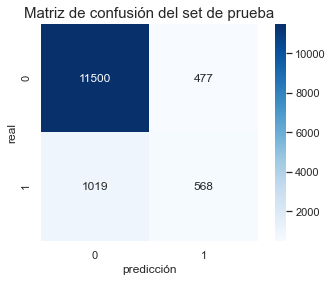

In [55]:
from sklearn.metrics import confusion_matrix

matrix = confusion_matrix(y_test, y_test_pred)
sns.heatmap(matrix, annot=True, fmt="d", cmap='Blues', square=True)
plt.title('Matriz de confusión del set de prueba', fontsize = 15)
plt.xlabel("predicción")
plt.ylabel("real")
plt.show()

In [56]:
from sklearn.metrics import classification_report
report = classification_report(y_test, y_test_pred)
print(report)

              precision    recall  f1-score   support

           0       0.92      0.96      0.94     11977
           1       0.54      0.36      0.43      1587

    accuracy                           0.89     13564
   macro avg       0.73      0.66      0.69     13564
weighted avg       0.87      0.89      0.88     13564



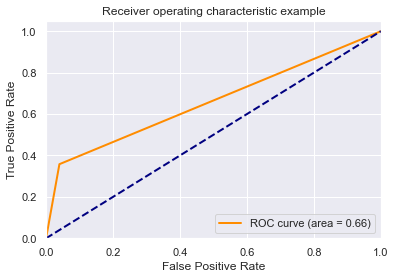

In [57]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_test, y_test_pred)
roc_auc = auc(fpr, tpr)
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

Luego de haber podado el árbol se observa una pequeña mejora en cuanto al recall, ya que ahora el modelo es capaz de predecir correctamente 568 valores de la clase minoritaria, la 1, de un total de 1587, es decir pudo predecir correctamente el 36% de la clase minoritaria. 

#### 5. Aplicar una mejora con técnicas de boosting y comparar el resultado con el anterior

En las técnicas de boosting, se entrena una secuencia de modelos donde se da más peso a los ejemplos que fueron clasificados erróneamente por iteraciones anteriores.
La tarea de clasificación se resuelve con una mayoría ponderada de votos, en cada iteración los nuevos modelos van a tener en cuenta la clasificación del anterior, y pondrán más peso o importancia en clasificar aquellas instancias que el anterior clasificó mal.

In [101]:
from sklearn.ensemble import AdaBoostClassifier

params = {'base_estimator':[DecisionTreeClassifier(max_depth = 2), DecisionTreeClassifier(max_depth = 3), DecisionTreeClassifier(max_depth = 4),
                            DecisionTreeClassifier(max_depth = 5), DecisionTreeClassifier(max_depth = 6), DecisionTreeClassifier(max_depth = 7),
                            DecisionTreeClassifier(max_depth = 8), DecisionTreeClassifier(max_depth = 9), DecisionTreeClassifier(max_depth = 10),
                            DecisionTreeClassifier(max_depth = 11), DecisionTreeClassifier(max_depth = 12), DecisionTreeClassifier(max_depth = 13), 
                            DecisionTreeClassifier(max_depth = 14), DecisionTreeClassifier(max_depth = 15)]}

model_adaboost = RandomizedSearchCV(AdaBoostClassifier(random_state=42), param_distributions =params, cv=3, scoring = 'recall')
model_adaboost = model_adaboost.fit(X_train, y_train)

print('Best Score: %.3f'%model_adaboost.best_score_)
print('Recall Score: ',model_adaboost.best_params_)

y_train_pred2 = model_adaboost.predict(X_train)
y_test_pred2 = model_adaboost.predict(X_test)

Best Score: 0.363
Recall Score:  {'base_estimator': DecisionTreeClassifier(max_depth=5)}


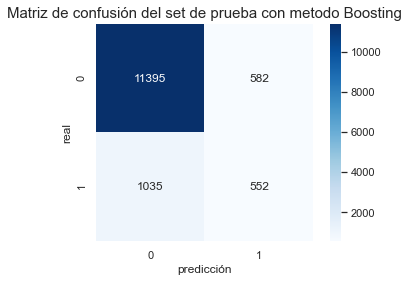

In [103]:
matrix2 = confusion_matrix(y_test, y_test_pred2)
sns.heatmap(matrix2, annot=True, fmt="d", cmap='Blues', square=True)
plt.title('Matriz de confusión del set de prueba con metodo Boosting', fontsize = 15)
plt.xlabel("predicción")
plt.ylabel("real")
plt.show()

In [104]:
report2 = classification_report(y_test, y_test_pred2)
print(report2)

              precision    recall  f1-score   support

           0       0.92      0.95      0.93     11977
           1       0.49      0.35      0.41      1587

    accuracy                           0.88     13564
   macro avg       0.70      0.65      0.67     13564
weighted avg       0.87      0.88      0.87     13564



Vemos tanto en el reporte como la matriz de confusión, que subió un poco el recall (de 0,33 a 0,35) pero la precisión bajo (de 0,54 a 0,49). 
Igualmente se sigue equivocando en la clasificación de la clase que nos interesa más de lo que predice bien, en este caso pudo clasificar correctamente a 552 de 1587 instancias, es decir un 35% (recall) 

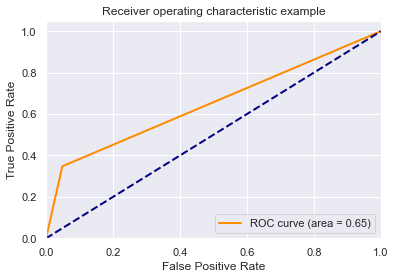

In [105]:
fpr, tpr, thresholds = roc_curve(y_test, y_test_pred2)
roc_auc = auc(fpr, tpr)
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

Vemos que el area bajo la curva da igual que en el caso de un único árbol de decisión: 0,65

El dataset seleccionado tiene la característica de que la clase target está desbalanceada: la clase positiva, es decir aquellos individuos que sí acceden al depósito a plazo, representa el 11,7% del total de clientes.
Esto hace que la eficiencia de los modelos aplicados sea baja. 
Lo que podría hacerse para mejorar la predicción es aplicar un método de re-sampleo de forma de artificialmente equiparar la clase negativa y la positiva. 
Otro punto a tener en cuenta con respecto al dataset elegido es que al aplicar un modelo no supervisado no se logró una buena separación de grupos, por lo que tal vez habría que incluir más información sobre lugar donde vive el individuo o si tiene cuentas en otros bancos como para separar mas los cluster y poder identificar cada uno con mayor claridad. 

1    39992
0    39922
Name: y, dtype: int64


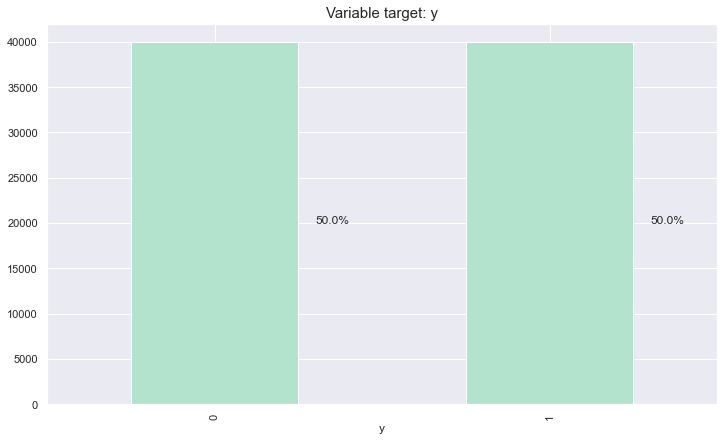

In [126]:
from sklearn.utils import resample

# Separo las clases: mayoritaria (0) y minoritaria (1)
data_mayoritaria = dataset[dataset['y'] == 0]
data_minoritaria = dataset[dataset['y'] == 1]
 
# Upsample minority class
data_minoritaria_resample = resample(data_minoritaria, 
                                 replace=True,     
                                 n_samples=39992,    #para que tenga la misma cantidad de datos que la clase mayoritaria
                                 random_state=123) 
 
# Combino las dos clases
data_resample = pd.concat([data_mayoritaria, data_minoritaria_resample])
 
# Display new class counts
print(data_resample.y.value_counts())

ax = data_resample.groupby(['y']).size().plot(kind = 'bar', stacked=True, figsize = (12,7), cmap = 'Pastel2')
total = len(data_resample)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width() + 0.05
    y = p.get_y() + p.get_height()/2
    ax.annotate(percentage, (x, y))
    
plt.title('Variable target: y', fontsize = 15)
plt.show()

In [132]:
y_resample = data_resample['y']
X_resample = data_resample.drop(['y'], axis = 1)

print(y_resample.shape, X_resample.shape)

(79914,) (79914, 28)


In [133]:
from sklearn.model_selection import train_test_split
X_train_resample, X_test_resample, y_train_resample, y_test_resample = train_test_split(X_resample, y_resample, test_size=0.30, random_state = 42, stratify = y_resample)

In [134]:
#Escalo los datos
scl = StandardScaler()
X_train_resample = scl.fit_transform(X_train_resample)
X_test_resample = scl.transform(X_test_resample)

In [135]:
#Vuelvo a aplicar el modelo de arbol de decision
tree = DecisionTreeClassifier(random_state=42)

# Random Search
model = RandomizedSearchCV(tree,param_distributions={'max_depth': np.arange(2, 16)}, cv=5, refit=True)

model.fit(X_train_resample, y_train_resample)

print("Mejores parametros: "+str(model.best_params_))
print("Mejor Score: "+str(model.best_score_)+'\n')

#Hago las predicciones con el modelo 
y_train_pred3 = model.predict(X_train_resample)
y_test_pred3 = model.predict(X_test_resample)


precision_train3 = metrics.precision_score(y_train_resample, y_train_pred3)
precision_test3 = metrics.precision_score(y_test_resample, y_test_pred3)

print('Precision Train: ',precision_train3)
print('Precision Test: ',precision_test3)

Mejores parametros: {'max_depth': 15}
Mejor Score: 0.8801552308707572

Precision Train:  0.874576599245137
Precision Test:  0.8373341068968018


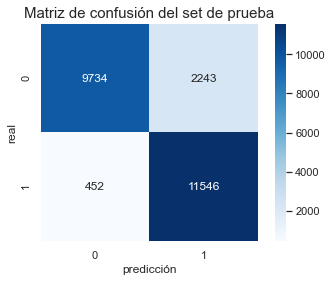

In [137]:
matrix = confusion_matrix(y_test_resample, y_test_pred3)
sns.heatmap(matrix, annot=True, fmt="d", cmap='Blues', square=True)
plt.title('Matriz de confusión del set de prueba', fontsize = 15)
plt.xlabel("predicción")
plt.ylabel("real")
plt.show()

In [138]:
report3 = classification_report(y_test_resample, y_test_pred3)
print(report3)

              precision    recall  f1-score   support

           0       0.96      0.81      0.88     11977
           1       0.84      0.96      0.90     11998

    accuracy                           0.89     23975
   macro avg       0.90      0.89      0.89     23975
weighted avg       0.90      0.89      0.89     23975



Vemos que con el sobremuestreo de la clase minoritaria, al tener las dos clases balanceadas, el modelo predijo mucho mejor, de los 11998 casos de la clase 1, el modelo predijo bien 11546 de ellos, que corresponden al 96%, el recall.